In [43]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**PART 1**

In [44]:
login_df = pd.read_json('logins.json')

In [45]:
login_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [46]:
login_df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [47]:
login_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [48]:
adjusted_date_range = pd.date_range('1970-01-01 20:00:00', '1970-04-13 19:00:00', freq='15min')
ts = pd.Series(np.zeros(len(adjusted_date_range)), index=adjusted_date_range)

In [49]:
ts.head()

1970-01-01 20:00:00    0.0
1970-01-01 20:15:00    0.0
1970-01-01 20:30:00    0.0
1970-01-01 20:45:00    0.0
1970-01-01 21:00:00    0.0
Freq: 15T, dtype: float64

In [50]:
login_df = login_df.sort_values('login_time')
login_df = login_df.reset_index(drop=True)
login_df.head()

,login_time
0,1970-01-01 20:12:16
1,1970-01-01 20:13:18
2,1970-01-01 20:16:10
3,1970-01-01 20:16:36
4,1970-01-01 20:16:37


In [51]:
p = 0 
for i in range(len(login_df)):
    s = ts.index[p] #start time
    e = ts.index[p+1] #end time
    t = login_df['login_time'][i]
    if s < t < e:
        ts[p] = ts[p] + 1
    else:
        while (e < t): #move to the next time in ts 
            p = p + 1 
            s = ts.index[p] 
            e = ts.index[p+1] 
        ts[p] = ts[p] + 1

In [52]:
ts.head()

1970-01-01 20:00:00    2.0
1970-01-01 20:15:00    6.0
1970-01-01 20:30:00    9.0
1970-01-01 20:45:00    7.0
1970-01-01 21:00:00    1.0
Freq: 15T, dtype: float64

In [53]:
ts.tail()

1970-04-13 18:00:00    5.0
1970-04-13 18:15:00    2.0
1970-04-13 18:30:00    7.0
1970-04-13 18:45:00    6.0
1970-04-13 19:00:00    0.0
Freq: 15T, dtype: float64

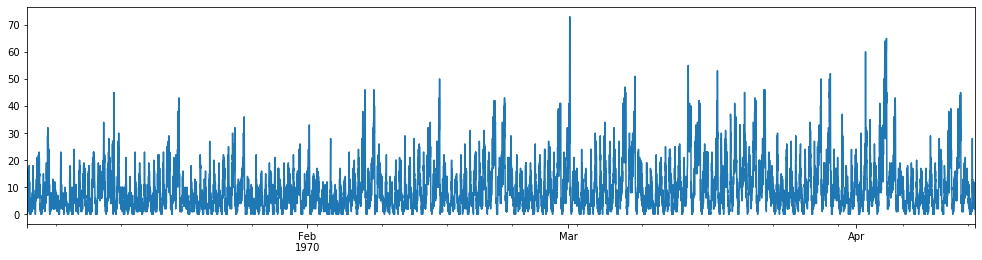

In [54]:
plt.figure(figsize=(17,4))
ts.plot()

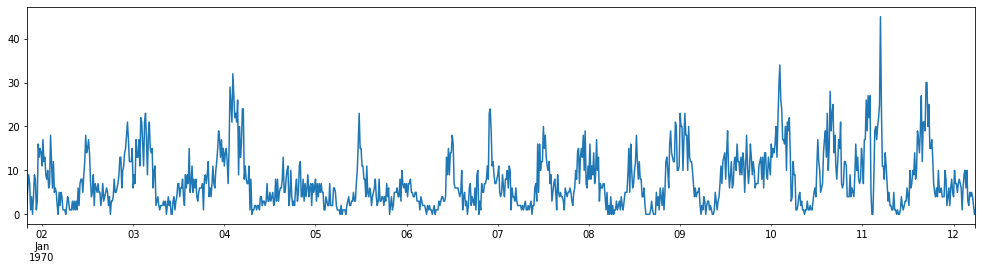

In [55]:
plt.figure(figsize=(17,4))
ts[0:1000].plot()

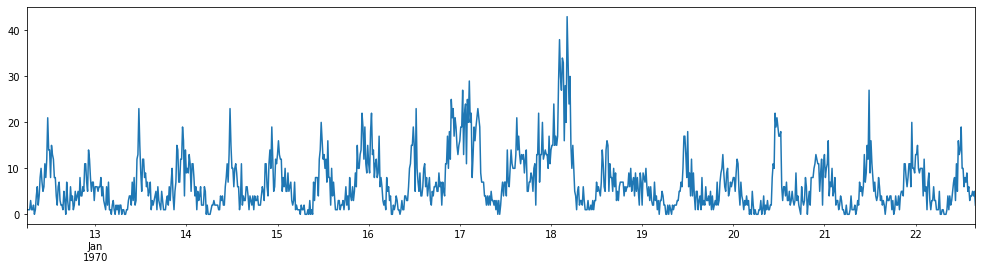

In [56]:
plt.figure(figsize=(17,4))
ts[1000:2000].plot()

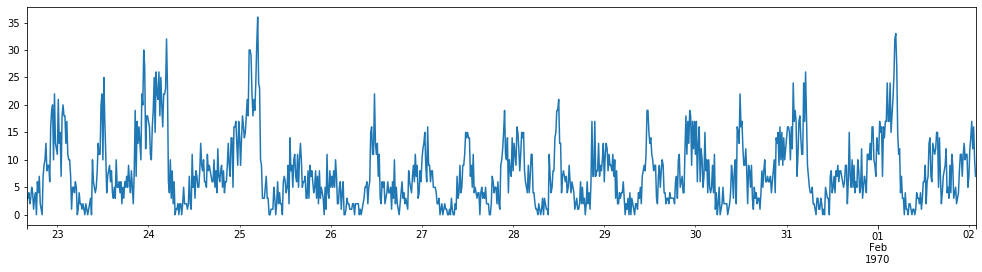

In [57]:
plt.figure(figsize=(17,4))
ts[2000:3000].plot()

Every week, on Sunday, number of logins spike. Also, beginning of March and April 1970 saw even greater spikes. 

There is no serious issue with data quality.

**PART 2**

What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

I would use the number of active users per driver partner to determine if the experiment of reimbursing toll costs is working.

Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. 

First of all, we need more data about drivers and their daily trips. Using that and riders data, we can see if the proposed change would result in better retention of riders and drivers. I would use t-test to compare before/after the experiment.

In [58]:
with open('ultimate_data_challenge.json') as f:
   data = json.load(f)

ultimate_df = pd.DataFrame(data)
ultimate_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [59]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [60]:
ultimate_df.shape

(50000, 12)

City managers are trying to encourage drivers to use both cities (Gotham and Metropolis) and also trying to improve the ridership. 

In [61]:
ultimate_df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [62]:
#Is there any data missing?
total_missing_records = ultimate_df.isnull().sum().sort_values(ascending = False)
percent_missing_records = (ultimate_df.isnull().sum()/ultimate_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total_missing_records, percent_missing_records], axis=1, keys=['Total Missing', 'Percent Missing']).transpose()

,avg_rating_of_driver,phone,avg_rating_by_driver,avg_dist,weekday_pct,ultimate_black_user,surge_pct,last_trip_date,avg_surge,signup_date,trips_in_first_30_days,city
Total Missing,8122.000,396.000,201.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent Missing,16.244,0.792,0.402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
# Go thru the dataframe and find if the user is still active at the end of six months.

active_users = []

for i in range(len(ultimate_df)):
    st = pd.Timestamp(ultimate_df['signup_date'][i]) # start date
    et = st + pd.Timedelta('181D') # start date + 6 months
    at = et - pd.Timedelta('30D') # 30 days prior to end date
    if at <= pd.Timestamp(ultimate_df['last_trip_date'][i]) <= et:
        active_users.append([1]) # now that the active condition has been met, set active user to 1
    else:
        active_users.append([0])

In [64]:
temp_df = pd.DataFrame(active_users,columns = ['active_users'])
temp_df['active_users'].value_counts()

0    37802
1    12198
Name: active_users, dtype: int64

In [65]:
ultimate_df = ultimate_df.fillna(ultimate_df.mean()) #To replace invalid values with mean

**PART 3**

**EXPLORING CORRELATIONS**

Null Hypothesis: There is no relationship between "active_user" and "avg_rating_of_driver". 

Significance Level: 99.9% Confidence (alpha = 0.01)

In [66]:
from scipy import stats

In [67]:
r, pvalue = stats.pearsonr(temp_df['active_users'], ultimate_df['avg_rating_of_driver'])
print('Correlation: {:0.4f},  p-value: {:0.2e}'.format(r, pvalue))

# Print interpretation:
alpha = 0.01
if pvalue > alpha:
    print('Fail to Reject the Null Hypothesis.')
else:
    print('Reject the Null Hypothesis.')

Correlation: -0.0084,  p-value: 6.15e-02
Fail to Reject the Null Hypothesis.


In [68]:
r, pvalue = stats.pearsonr(temp_df['active_users'], ultimate_df['avg_dist'])
print('Correlation: {:0.4f},  p-value: {:0.2e}'.format(r, pvalue))

# Print interpretation:
alpha = 0.01
if pvalue > alpha:
    print('Fail to Reject the Null Hypothesis.')
else:
    print('Reject the Null Hypothesis.')

Correlation: -0.0918,  p-value: 5.05e-94
Reject the Null Hypothesis.


"avg_dist" is the useful data!

In [69]:
r, pvalue = stats.pearsonr(temp_df['active_users'], ultimate_df['avg_rating_by_driver'])
print('Correlation: {:0.4f},  p-value: {:0.2e}'.format(r, pvalue))

# Print interpretation:
alpha = 0.01
if pvalue > alpha:
    print('Fail to Reject the Null Hypothesis.')
else:
    print('Reject the Null Hypothesis.')

Correlation: -0.0223,  p-value: 6.06e-07
Reject the Null Hypothesis.


"avg_rating_by_driver" is the useful data as well

In [70]:
r, pvalue = stats.pearsonr(temp_df['active_users'], ultimate_df['trips_in_first_30_days'])
print('Correlation: {:0.4f},  p-value: {:0.2e}'.format(r, pvalue))

# Print interpretation:
alpha = 0.01
if pvalue > alpha:
    print('Fail to Reject the Null Hypothesis.')
else:
    print('Reject the Null Hypothesis.')

Correlation: 0.2048,  p-value: 0.00e+00
Reject the Null Hypothesis.


In [71]:
r, pvalue = stats.pearsonr(temp_df['active_users'], ultimate_df['ultimate_black_user'])
print('Correlation: {:0.4f},  p-value: {:0.2e}'.format(r, pvalue))

# Print interpretation:
alpha = 0.01
if pvalue > alpha:
    print('Fail to Reject the Null Hypothesis.')
else:
    print('Reject the Null Hypothesis.')

Correlation: 0.1592,  p-value: 6.19e-281
Reject the Null Hypothesis.


In [72]:
r, pvalue = stats.pearsonr(temp_df['active_users'], ultimate_df['weekday_pct'])
print('Correlation: {:0.4f},  p-value: {:0.2e}'.format(r, pvalue))

# Print interpretation:
alpha = 0.01
if pvalue > alpha:
    print('Fail to Reject the Null Hypothesis.')
else:
    print('Reject the Null Hypothesis.')

Correlation: 0.0055,  p-value: 2.17e-01
Fail to Reject the Null Hypothesis.


In [73]:
r, pvalue = stats.pearsonr(temp_df['active_users'], ultimate_df['avg_surge'])
print('Correlation: {:0.4f},  p-value: {:0.2e}'.format(r, pvalue))

# Print interpretation:
alpha = 0.01
if pvalue > alpha:
    print('Fail to Reject the Null Hypothesis.')
else:
    print('Reject the Null Hypothesis.')

Correlation: 0.0063,  p-value: 1.61e-01
Fail to Reject the Null Hypothesis.


In [74]:
r, pvalue = stats.pearsonr(temp_df['active_users'], ultimate_df['surge_pct'])
print('Correlation: {:0.4f},  p-value: {:0.2e}'.format(r, pvalue))

# Print interpretation:
alpha = 0.01
if pvalue > alpha:
    print('Fail to Reject the Null Hypothesis.')
else:
    print('Reject the Null Hypothesis.')

Correlation: 0.0170,  p-value: 1.38e-04
Reject the Null Hypothesis.


Based on pearson correlation coefficients above, we can conclude that avg_rating_of_driver, weekday_pct, avg_surge don't have correlation with whether the user is going to be active or not. We can drop these fields from the dataframe. 

In [75]:
df = pd.concat([ultimate_df, temp_df], axis = 1)

In [76]:
df = df.drop(['avg_rating_of_driver', 'avg_surge','weekday_pct', 'signup_date', 'last_trip_date'], axis = 1)
df.head()

,city,trips_in_first_30_days,phone,surge_pct,ultimate_black_user,avg_dist,avg_rating_by_driver,active_users
0,King's Landing,4,iPhone,15.4,True,3.67,5.0,0
1,Astapor,0,Android,0.0,False,8.26,5.0,0
2,Astapor,3,iPhone,0.0,False,0.77,5.0,0
3,King's Landing,9,iPhone,20.0,True,2.36,4.9,1
4,Winterfell,14,Android,11.8,False,3.13,4.9,0


Let's encode the categorical features

In [77]:
categorical_features = ['city', 'phone', 'ultimate_black_user']

In [78]:
df = pd.get_dummies(df, columns = categorical_features)

In [79]:
df.head()

,trips_in_first_30_days,surge_pct,avg_dist,avg_rating_by_driver,active_users,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,4,15.4,3.67,5.0,0,0,1,0,0,1,0,1
1,0,0.0,8.26,5.0,0,1,0,0,1,0,1,0
2,3,0.0,0.77,5.0,0,1,0,0,0,1,1,0
3,9,20.0,2.36,4.9,1,0,1,0,0,1,0,1
4,14,11.8,3.13,4.9,0,0,0,1,1,0,1,0


In [80]:
target = 'active_users'
X = df.drop(target, axis=1)
y = df[target].values

In [81]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\rammu_000\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[14454   688]
 [ 3902   956]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86     15142
           1       0.58      0.20      0.29      4858

    accuracy                           0.77     20000
   macro avg       0.68      0.58      0.58     20000
weighted avg       0.74      0.77      0.72     20000



In [85]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]

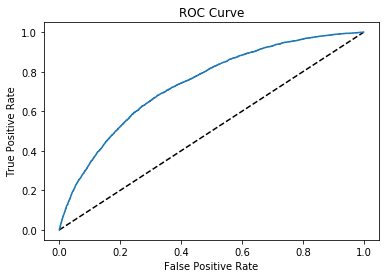

In [87]:
# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [89]:
from sklearn.metrics import roc_auc_score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.7391000572649455


In [90]:
import lightgbm as lgb

In [93]:
params={'learning_rate': 0.005,
        'objective': 'binary',
        'metric': 'auc',
        'num_threads': -1,
        'num_leaves': 256,
        'verbose': 1,
        'random_state': 42,
        'bagging_fraction': 1,
        'feature_fraction': 0.85
       }

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

clf = lgb.LGBMClassifier(**params, n_estimators=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13887  1255]
 [ 2898  1960]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87     15142
           1       0.61      0.40      0.49      4858

    accuracy                           0.79     20000
   macro avg       0.72      0.66      0.68     20000
weighted avg       0.77      0.79      0.78     20000



Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.

I have created a new column "active_users" to track if the rider is active in his/her 6th month on the system. Then, I have used both logistic regression and lightgbm models to predict the results. lightgbm predicted better than logistic regression with 0.79 accuracy. 